### Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import plot_dist, solve, plot_dist_3d, plot_results
from scipy.stats import norm
from NB import GaussNB

### Create the data

In [2]:
#Parameters to set
mu_c0, mu_c1 = (0, 0), (3, 3)
cov_c0, cov_c1 = [[1.2, 0], [0, 1.0]], [[2.0, 0], [0, 2.5]]
 
# Create the data
XC0 = np.random.multivariate_normal(mu_c0, cov_c0, size=1000)
XC1 = np.random.multivariate_normal(mu_c1, cov_c1, size=1000)

# Calculate the intesection between distributions
inter1 = solve(mu_c0[0], mu_c1[0], cov_c0[0][0], cov_c1[0][0])
inter2 = solve(mu_c0[1], mu_c1[1], cov_c0[1][1], cov_c1[1][1])

In [3]:
# Create a dataframe of the data
dataset = pd.DataFrame(
    {
        'X1':np.ravel([XC0[:,0], XC1[:,0]]),
        'X2':np.ravel([XC0[:,1], XC1[:,1]]),
        'class':np.ravel([[1]*len(XC1), [0]*len(XC1)])
    }
).sample(len(XC0)).reset_index(drop=True)

dataset.head()

,X1,X2,class
0,-0.155076,-0.313573,1
1,-0.630572,-1.341471,1
2,1.195342,-1.061410,1
3,-0.345739,-0.277084,1
4,0.631105,0.390745,1


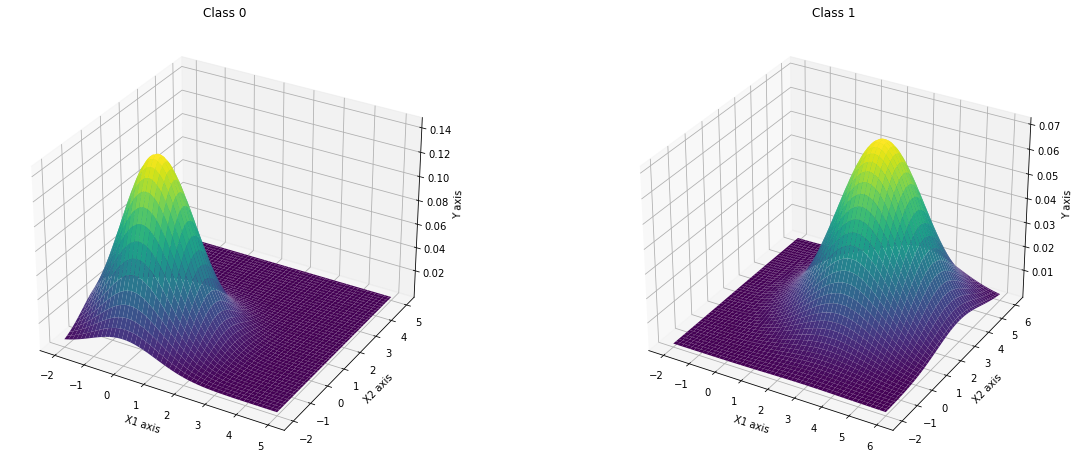

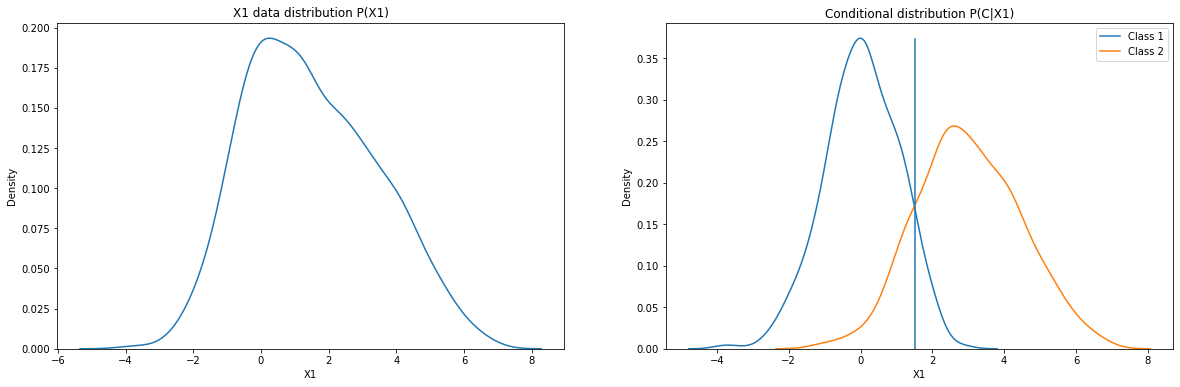

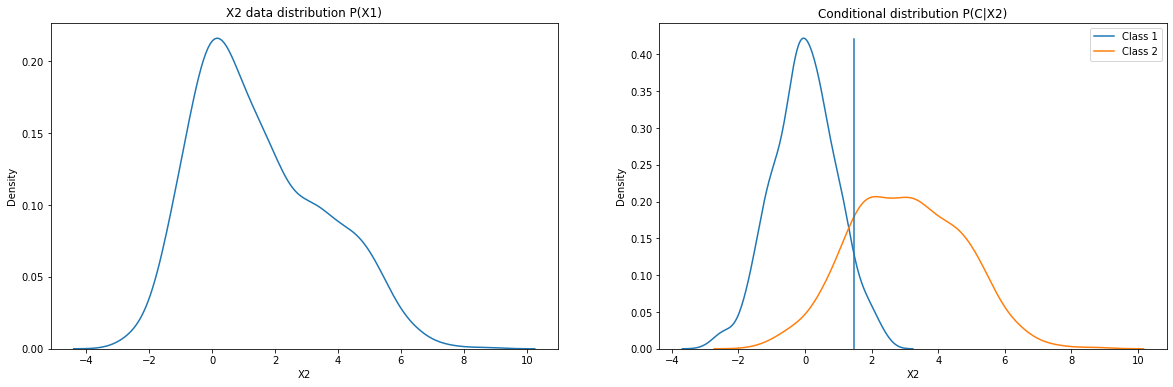

In [4]:
# plot the data
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_dist_3d(mu_c0, cov_c0, [-2, 5], 100, ax, 'Class 0')
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot_dist_3d(mu_c1, cov_c1, [-2, 6], 100, ax, 'Class 1')

# plot the first feature
plot_dist(dataset, 'X1', 'class', inter1)

# plot the first feature
plot_dist(dataset, 'X2', 'class', inter2)

In [5]:
# sort data into classes
X, y = dataset[['X1', 'X2']].values, dataset['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [6]:
model = GaussNB()
model.fit(X_train, y_train)

pred = model.predict(X_test)

Accuracy: 0.9533
F1-Score: 1


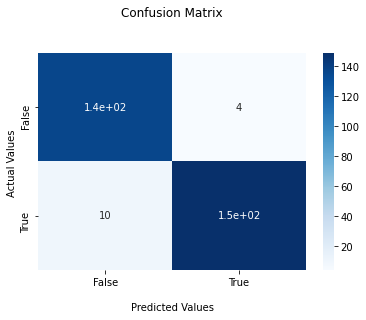

In [18]:
plot_results(pred, y_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

sk_model = GaussianNB()
sk_model.fit(X_train, y_train)

pred = sk_model.predict(X_test)

Accuracy: 0.9533
F1-Score: 1


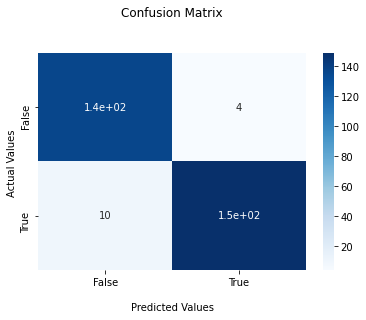

In [22]:
plot_results(pred, y_test)